In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [2]:
import sys

import numpy as np
import random 
import tensorflow as tf

from tensorflow import keras
from keras import layers

from matplotlib import pyplot as plt

from scripts.CustomCallbacks import CustomLogger
import scripts.utils as utils
import scripts.Slopes as Slopes

utils.reset_seeds(0)

In [3]:
# working, keep a working copy and do not touchy touchy
import keras.backend as K
import numpy as np

def neg_log_likelihood(ytrue ,ypreds):
    n_dims = int(int(ypreds.shape[1])/2)
    mu = ypreds[:, 0:n_dims]
    logsigma = ypreds[:, n_dims:]
    
    mse = -0.5*K.sum(K.square((ytrue-mu)/K.exp(logsigma)),axis=1)
    sigma_trace = -K.sum(logsigma, axis=1)
    log2pi = -0.5*n_dims*np.log(2*np.pi)
    
    log_likelihood = mse+sigma_trace+log2pi

    return K.mean(-log_likelihood)

In [6]:
def plot_mean_and_variance(m, X, X_train=np.linspace(-1, 1, 50), y_train=None):
    # for each prediction, plot the mean value and the variance of the prediction
    if y_train is None:
        y_train = X_train**2
        
    y_pred = m.predict(X)
    # print(y_pred)
    y_pred_mean, y_pred_sd = y_pred[:,0], y_pred[:,1]
    y_pred_sd = np.exp(y_pred_sd)
    plt.plot(X, y_pred_mean, label="mean")
    plt.fill_between(X, y_pred_mean - y_pred_sd, y_pred_mean + y_pred_sd, alpha=0.2, label="variance")
    plt.scatter(X_train, y_train, marker='+', color="red", label="train")
    plt.legend()
    plt.show()

Epoch:   0 | Loss: 4.04089e-01
Epoch: 100 | Loss: -2.91349e-01
Epoch: 200 | Loss: -4.65088e-01
Epoch: 300 | Loss: -5.20745e-01
Epoch: 400 | Loss: -5.51629e-01
Epoch: 500 | Loss: -5.71891e-01
Epoch: 600 | Loss: -5.88552e-01
Epoch: 700 | Loss: -6.05906e-01
Epoch: 800 | Loss: -6.22126e-01
Epoch: 900 | Loss: -6.39178e-01
Epoch: 1000 | Loss: -6.55157e-01
Epoch: 1100 | Loss: -6.77181e-01
Epoch: 1200 | Loss: -6.98408e-01
Epoch: 1300 | Loss: -7.24343e-01
Epoch: 1400 | Loss: -7.51173e-01
Epoch: 1500 | Loss: -7.83211e-01
Epoch: 1600 | Loss: -8.09864e-01
Epoch: 1700 | Loss: -8.53419e-01
Epoch: 1800 | Loss: -8.92308e-01
Epoch: 1900 | Loss: -9.28519e-01
Epoch: 2000 | Loss: -9.98265e-01
Epoch: 2100 | Loss: -1.04431e+00
Epoch: 2200 | Loss: -1.00222e+00
Epoch: 2300 | Loss: -1.09864e+00
Epoch: 2400 | Loss: -1.18030e+00
Epoch: 2500 | Loss: -1.19626e+00
Epoch: 2600 | Loss: -1.25830e+00
Epoch: 2700 | Loss: -1.18269e+00
Epoch: 2800 | Loss: -9.89342e-01
Epoch: 2900 | Loss: -1.30936e+00
Epoch: 3000 | Loss: -

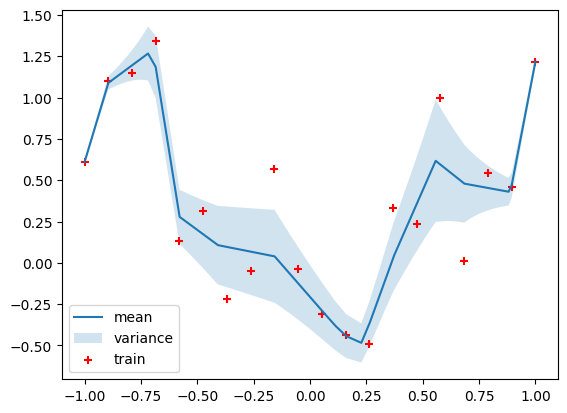

In [22]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=10, activation='relu', name="layer_1"),
    layers.Dense(units=10, activation='relu', name="layer_2"),
    # layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 20)
y = X**2 + np.random.normal(0, 0.3, size=X.shape)
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=4000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plot_mean_and_variance(model, X_valid, X_train, y_train)

Epoch:   0 | Loss: 5.49068e-01
Epoch: 100 | Loss: 1.29138e-02
Epoch: 200 | Loss: -1.38299e-01
Epoch: 300 | Loss: -1.61697e-01
Epoch: 400 | Loss: -1.78088e-01
Epoch: 500 | Loss: -1.90728e-01
Epoch: 600 | Loss: -2.00496e-01
Epoch: 700 | Loss: -2.08161e-01
Epoch: 800 | Loss: -2.14271e-01
Epoch: 900 | Loss: -2.21794e-01
Epoch: 1000 | Loss: -2.30131e-01
Epoch: 1100 | Loss: -2.46334e-01
Epoch: 1200 | Loss: -2.55442e-01
Epoch: 1300 | Loss: -2.67815e-01
Epoch: 1400 | Loss: -2.80149e-01
Epoch: 1500 | Loss: -2.92499e-01
Epoch: 1600 | Loss: -3.07789e-01
Epoch: 1700 | Loss: -3.27905e-01
Epoch: 1800 | Loss: -3.48818e-01
Epoch: 1900 | Loss: -3.69620e-01
Epoch: 2000 | Loss: -3.94413e-01
Epoch: 2100 | Loss: -4.21500e-01
Epoch: 2200 | Loss: -4.48579e-01
Epoch: 2300 | Loss: -5.00949e-01
Epoch: 2400 | Loss: -5.60519e-01
Epoch: 2500 | Loss: -6.19573e-01
Epoch: 2600 | Loss: -6.79441e-01
Epoch: 2700 | Loss: -7.56757e-01
Epoch: 2800 | Loss: -8.10940e-01
Epoch: 2900 | Loss: -9.10638e-01
Epoch: 3000 | Loss: -9

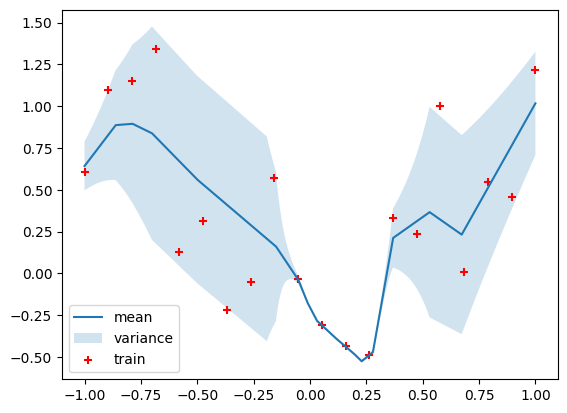

In [42]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=10, activation='relu', name="layer_1"),
    layers.Dense(units=10, activation='relu', name="layer_2"),
    # layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 20)
y = X**2 + np.random.normal(0, 0.3, size=X.shape)
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood_mittetootav,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=4000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plot_mean_and_variance(model, X_valid, X_train, y_train)

In [39]:
def neg_log_likelihood(ytrue ,ypreds):
    n_dims = int(int(ypreds.shape[1])/2)
    #print(n_dims)
    mu = ypreds[:, 0:1]
    logsigma = ypreds[:, 1:]
    
    mse = -0.5*tf.math.reduce_sum(tf.math.square((ytrue-mu)/tf.math.exp(logsigma)),axis=1)
    sigma_trace = -tf.math.reduce_sum(logsigma, axis=1)
    #log2pi = -0.5*n_dims*np.log(2*np.pi)
    
    log_likelihood = mse+sigma_trace #+log2pi

    return tf.math.reduce_mean(-log_likelihood)

In [41]:
# õige oiy_predicted[:,0:1], y_predicted[:,1:]
def neg_log_likelihood_mittetootav(y_true ,y_predicted):

    y_pred_mean, y_pred_sd = y_predicted[:,0:1], y_predicted[:,1:]

    y_pred_sd = tf.clip_by_value(t=y_pred_sd,
                                   clip_value_min=tf.constant(-15.0),
                                   clip_value_max=tf.constant(+15.0))

    # y_pred_sd ongi log variance
    return tf.reduce_mean(y_pred_sd + tf.math.square((y_pred_mean - y_true) / tf.math.exp(y_pred_sd)))